In [74]:
import torch 
import cv2
import os 
import glob
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as compare_ssim

plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题


In [63]:
test_path = 'F:/design/code/unet_42-master/test_predictions/'
label_path = test_path.replace('prediction','label')

test_path = glob.glob(os.path.join(test_path,'*'))
label_path = glob.glob(os.path.join(label_path,'*'))

num_patient = len(test_path)
def rename(img):
    loc = img.split('\\')
    num = loc.pop().split('.')
    num[0] = num[0].zfill(3)
    num = '.'.join(num)
    loc.append(num)
    loc = '\\'.join(loc)
    os.rename(img,loc)

def ssim(path1,path2):
    imageA = cv2.imread(path1,1)
    imageB = cv2.imread(path2,1)

    # convert the images to grayscale
    grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
    #grayA = imageA 
    #grayB = imageB

    # compute the Structural Similarity Index (SSIM) between the two
    # images, ensuring that the difference image is returned
    (score, diff) = compare_ssim(grayA, grayB, full=True)
    diff = (diff * 255).astype("uint8")
    return(score)

name = False
all_ssim = []
for patient in range(len(test_path)):
    test_img = sorted(glob.glob(os.path.join(test_path[patient],'*.png')),key=os.path.getmtime)
    label_img = sorted(glob.glob(os.path.join(label_path[patient],'*.png')),key=os.path.getmtime)
    patient_ssim = []
    for img in range(len(test_img)):
        if name:
            rename(test_img[img])
            rename(label_img[img])
        patient_ssim.append(ssim(test_img[img],label_img[img]))
    all_ssim.append(patient_ssim)

np.save('all_ssim.npy',all_ssim)

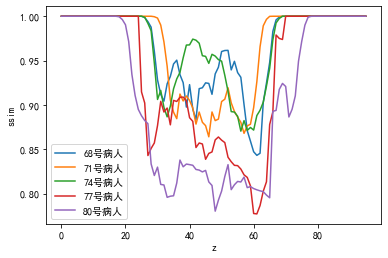

In [86]:


all_ssim = np.load('all_ssim.npy')
#os.mkdir('./ssim_picture')
x = range(96)
fig, ax = plt.subplots()
count = 0
for i in np.arange(num_patient,step=3):
    if i == 0:
        continue
    ax.plot(x,all_ssim[i],label=f"{i+65}号病人")
    count += 1
    if count == 5 :
        break
    

ax.set(xlabel='z',ylabel='ssim')
#ax.grid()
ax.legend()
plt.savefig('./ssim_picture/partly_patient_ssim.png')
plt.show()



No handles with labels found to put in legend.


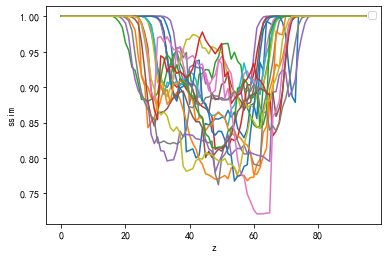

In [88]:
all_ssim = np.load('all_ssim.npy')
#os.mkdir('./ssim_picture')
x = range(96)
fig, ax = plt.subplots()
for i in np.arange(num_patient):
    if i == 0:
        continue
    ax.plot(x,all_ssim[i])
    

ax.set(xlabel='z',ylabel='ssim')
#ax.grid()
ax.legend()
plt.savefig('./ssim_picture/all_patient_ssim.png')
plt.show()

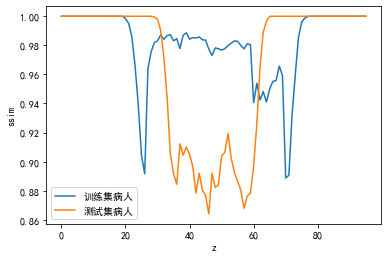

In [95]:
all_ssim = np.load('all_ssim.npy')
#os.mkdir('./ssim_picture')
x = range(96)
fig, ax = plt.subplots()
for i in np.arange(num_patient):
    if i == 0:
        ax.plot(x,all_ssim[i],label=f"训练集病人")
    if i == 6:
        ax.plot(x,all_ssim[i],label=f"测试集病人")
    

ax.set(xlabel='z',ylabel='ssim')
#ax.grid()
ax.legend()
plt.savefig('./ssim_picture/comparision_patient_ssim.png')
plt.show()